In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

In [ ]:
def cache_hit_rate(x):
    """
    Non-linear function to model cache hit rate increase
    x: normalized progress (0 to 1)
    """
    return 0.60 + 0.35 * (1 - np.exp(-3 * x))

In [ ]:
@interact
def generate_plot(queries_per_day = 600000, total_days = 30):

    # # Queries per day
    # queries_per_day = 600000

    # # Number of days for rollout
    # total_days = 30

    # Generate data points
    days = np.arange(1, total_days + 1)
    progress = days / total_days
    cache_rates = cache_hit_rate(progress)

    # Calculate LLM calls per day
    llm_rates = 1 - cache_rates
    llm_calls_per_day = llm_rates * queries_per_day

    # Calculate cumulative LLM calls
    cumulative_llm_calls = np.cumsum(llm_calls_per_day)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(days, llm_calls_per_day, label='Daily LLM Calls')
    # plt.plot(days, cumulative_llm_calls, label='Cumulative LLM Calls')
    plt.xlabel('Days')
    plt.ylabel('Number of LLM Calls')
    plt.title('LLM Calls per Day')
    plt.legend()
    plt.grid(True)

    # Print final values
    print(f"Final Daily LLM Call Rate: {llm_rates[-1]*100:.2f}%")
    print(f"Final Daily LLM Calls: {llm_calls_per_day[-1]:.0f}")
    print(f"Total LLM Calls after {total_days} days: {cumulative_llm_calls[-1]:.0f}")
    print(f"Average Daily LLM Calls: {np.mean(llm_calls_per_day):.0f}")

    return plt.show()

interactive(children=(IntSlider(value=600000, description='queries_per_day', max=1800000, min=-600000), IntSli…

Final Daily LLM Call Rate: 6.74%
Final Daily LLM Calls: 40455
Total LLM Calls after 30 days: 2797337
Average Daily LLM Calls: 93245


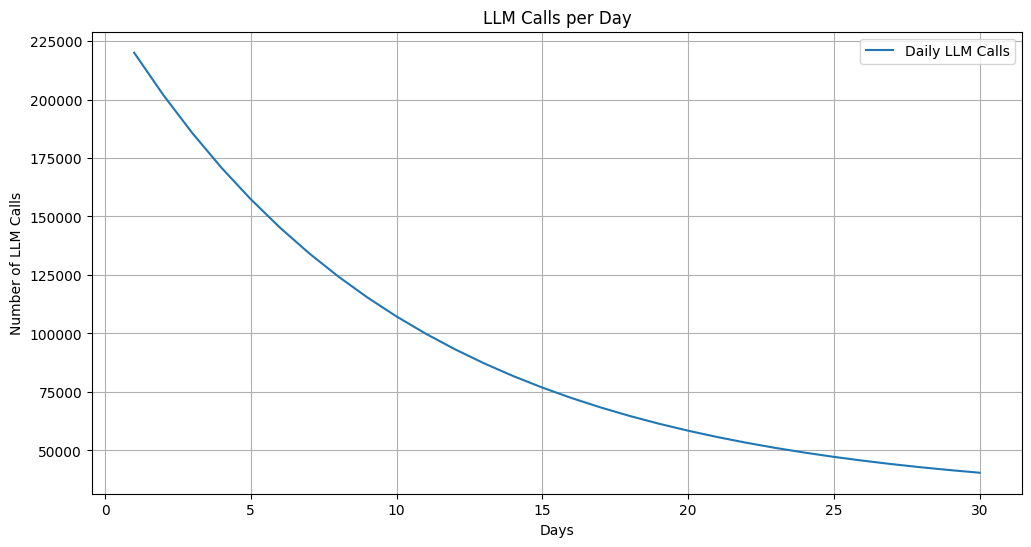

In [ ]:
@interact
def circle(radius=1.0, linewidth=1, color = ['red', 'blue', 'green']):
    angles = np.linspace(0,2*np.pi,100)
    fig, ax = plt.subplots()
    ax.set_aspect(1)
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.plot(radius*np.cos(angles), radius*np.sin(angles), linewidth = linewidth, c = color)
    plt.show()